In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()


In [2]:
df = pd.read_csv(r'C:\Users\hp\Downloads\sparks f internship dataset\iris.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
### 5 point summary
df.describe( include= 'all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
from sklearn.cluster import KMeans

In [6]:
## droping Id and Species
x = df.drop(['Species' , 'Id'] ,axis =1)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [68]:
xsc = sc.fit_transform(x)

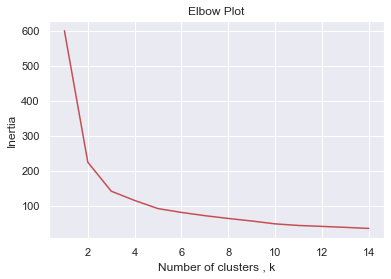

In [69]:
wcss = []
for i in range (1,15):
    kmeans = KMeans(n_clusters = i , random_state = 0 , max_iter= 300)
    kmeans.fit(xsc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15) ,wcss , color = 'r' )
plt.title('Elbow Plot')
plt.xlabel('Number of clusters , k')
plt.ylabel('Inertia')
plt.show()

In [87]:
## here we can see the sharp bend at  k =3 
## this shows the presence of 3 clusters although we have removed the target feature
kmeans = KMeans( n_clusters = 3  , max_iter = 300 , random_state = 0)

In [88]:
# lets fit model at k = 3 
kmeans.fit(xsc)

KMeans(n_clusters=3, random_state=0)

In [89]:
la = kmeans.labels_
a = pd.Series(la)
a.value_counts()

2    53
1    50
0    47
dtype: int64

In [90]:
from sklearn.metrics import silhouette_score

In [91]:
silhouette_score(xsc , la) ##  it basically tells us about the hetero genit of clusters , higher score tells us that clusters 
# are seperated from  good distance  , lies between  -1  to 1 

0.4589717867018717

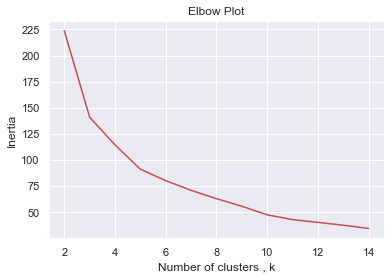

[2, 0.580184463257396, 3, 0.4589717867018717, 4, 0.3887799827106933, 5, 0.3497022541354177, 6, 0.32800245312290494, 7, 0.3250897228040125, 8, 0.33618236203354407, 9, 0.33313906243527525, 10, 0.35742516173065697, 11, 0.36172167753216095, 12, 0.3441321994355885, 13, 0.36045823878437067, 14, 0.3603799541822313]


In [92]:
###  silhouette scores  for different clusters
wcss = []
sl = []
for i in range (2,15):
    kmeans = KMeans(n_clusters = i , random_state = 0 , max_iter= 300)
    
    kmeans.fit(xsc)
    
    wcss.append(kmeans.inertia_)
    la = kmeans.labels_
    s = silhouette_score(xsc ,la)
    sl.append(i)
    sl.append(s)

    
    
    
plt.plot(range(2,15) ,wcss , color = 'r' )
plt.title('Elbow Plot')
plt.xlabel('Number of clusters , k')
plt.ylabel('Inertia')
plt.show()

print(sl)

In [103]:
km = KMeans( n_clusters = 3  , max_iter = 300 , random_state = 0)

In [104]:
km.fit(xsc)

KMeans(n_clusters=3, random_state=0)

In [106]:
lab = km.labels_

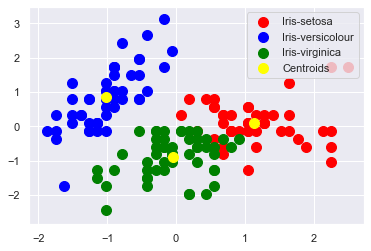

In [108]:
#Visualising the clusters - On the first two columns
plt.scatter(xsc[lab == 0, 0], xsc[lab == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(xsc[lab == 1, 0], xsc[lab == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(xsc[lab == 2, 0], xsc[lab == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [110]:
### here we can see that there are 3 clusters along with their centers , also we can see that their clusters are not that ,
# much well seperated , which was evident from silhouette scores 

### Aglomerative Clustering

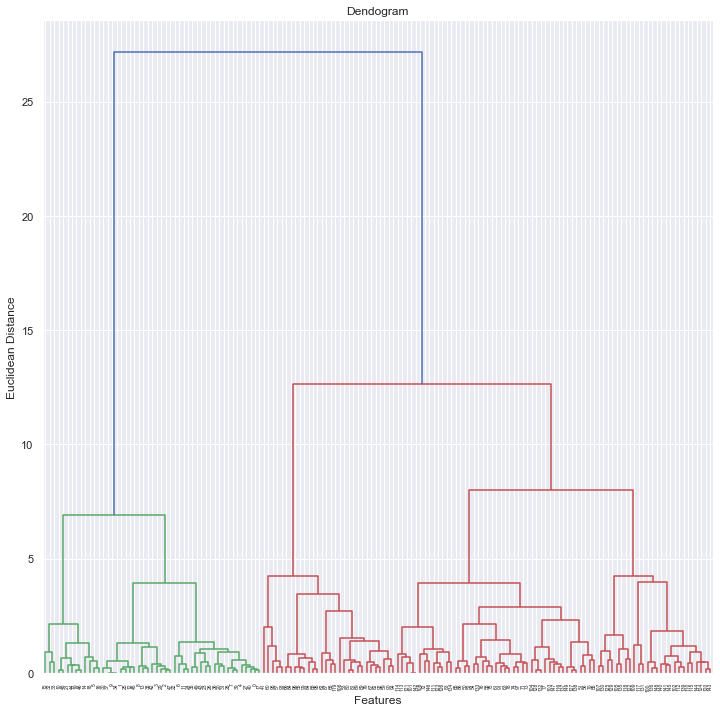

In [129]:
import scipy .cluster.hierarchy as sch
plt.figure(figsize = [12,12])
dendo = sch.dendrogram(sch.linkage(xsc, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Features')
plt.ylabel('Euclidean Distance')
plt.show()

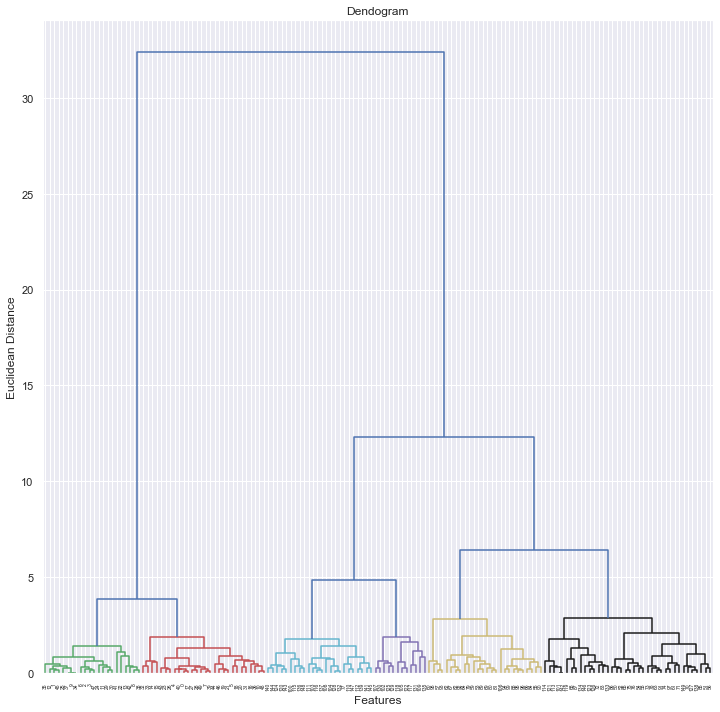

In [150]:
import scipy .cluster.hierarchy as sch
plt.figure(figsize = [12,12])
dendo = sch.dendrogram(sch.linkage(x, method = 'ward' ) , color_threshold= 3)
plt.title('Dendogram')
plt.xlabel('Features')
plt.ylabel('Euclidean Distance')
plt.show()

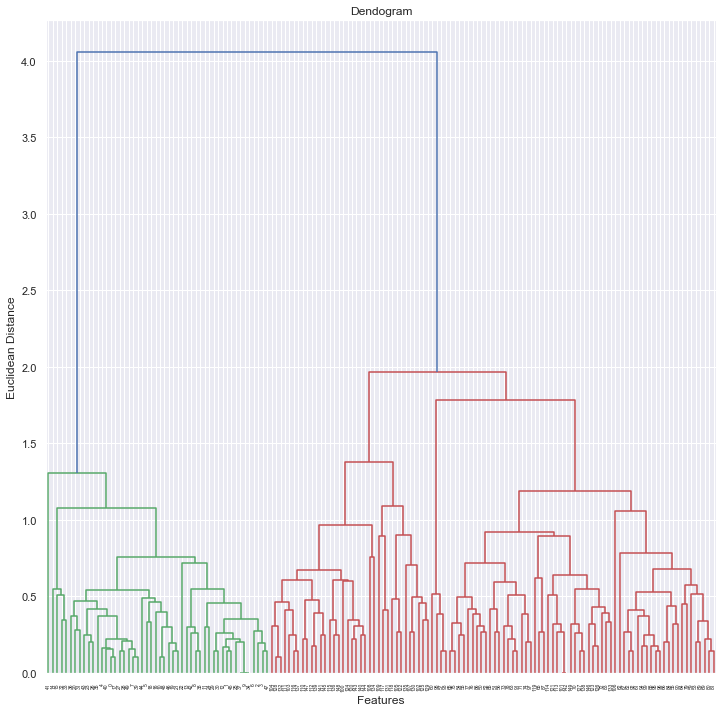

In [146]:
import scipy .cluster.hierarchy as sch
plt.figure(figsize = [12,12])
dendo = sch.dendrogram(sch.linkage(x, method = 'average' ) , color_threshold= 3)
plt.title('Dendogram')
plt.xlabel('Features')
plt.ylabel('Euclidean Distance')
plt.show()

In [128]:
from scipy.cluster import hierarchy 

In [137]:
from scipy.spatial.distance import pdist

In [145]:
c, cop_dist = hierarchy.cophenet(sch.linkage(xsc  , method = 'ward') , pdist(xsc))
c

0.8225754331448963

In [144]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
Z = linkage(xsc, 'ward')  #Average is having good score than ward
c, coph_dists = cophenet(Z , pdist(xsc))

c

0.8225754331448963

In [147]:
### but average is givving us better result then ward

In [149]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
Z = linkage(xsc, 'average')  #Average is having good score than ward
c, coph_dists = cophenet(Z , pdist(xsc))
c
## 

0.8532224412681922

##  The cophenetic correlation for a cluster tree is defined as the linear correlation coefficient between the cophenetic distances obtained from the tree, and the original distances (or dissimilarities) used to construct the tree. Thus, it is a measure of how faithfully the tree represents the dissimilarities among observations.